Mix Matrix
[[-0.01615986  0.00793463 -0.01648741 -0.00267833  0.03834265]
 [-0.07454198  0.09126228  0.040562   -0.03738707  0.02025506]
 [ 0.05105774 -0.0537668   0.03754048  0.06291139 -0.09738746]
 [-0.05752162  0.06455975  0.08050403 -0.05322057  0.00454344]
 [ 0.0134679  -0.01780733 -0.02569742  0.07671845  0.05720632]]
[[0.12683856 0.32966615 0.71394288 0.40941747 0.44481337]
 [0.53133461 0.43971077 0.28951853 0.01352992 0.66355721]
 [0.5265648  0.16559252 0.35967307 0.73328918 0.16807668]
 [0.49869113 0.39055967 0.15300852 0.49973179 0.57065251]
 [0.42035663 0.72397093 0.49209283 0.22877504 0.06854725]]
iteration:  0 0.6732189615192741 max= 0
0 0.6732189615192741 max= 0
[[0.73692213 0.35466041 0.12690836 0.10974933 0.55043753]
 [0.07562972 0.72484503 0.08702797 0.63140493 0.25024558]
 [0.38218776 0.24155055 0.31338784 0.46516362 0.69354453]
 [0.55160809 0.53223844 0.10385453 0.54681691 0.32044289]
 [0.02579788 0.02572339 0.93430495 0.25909033 0.24212655]]
iteration:  1 0.7442043

Correlation Matrix
[0.92142011 0.95409536 0.87124342 0.96194319 0.82076403]
0.905893222408349


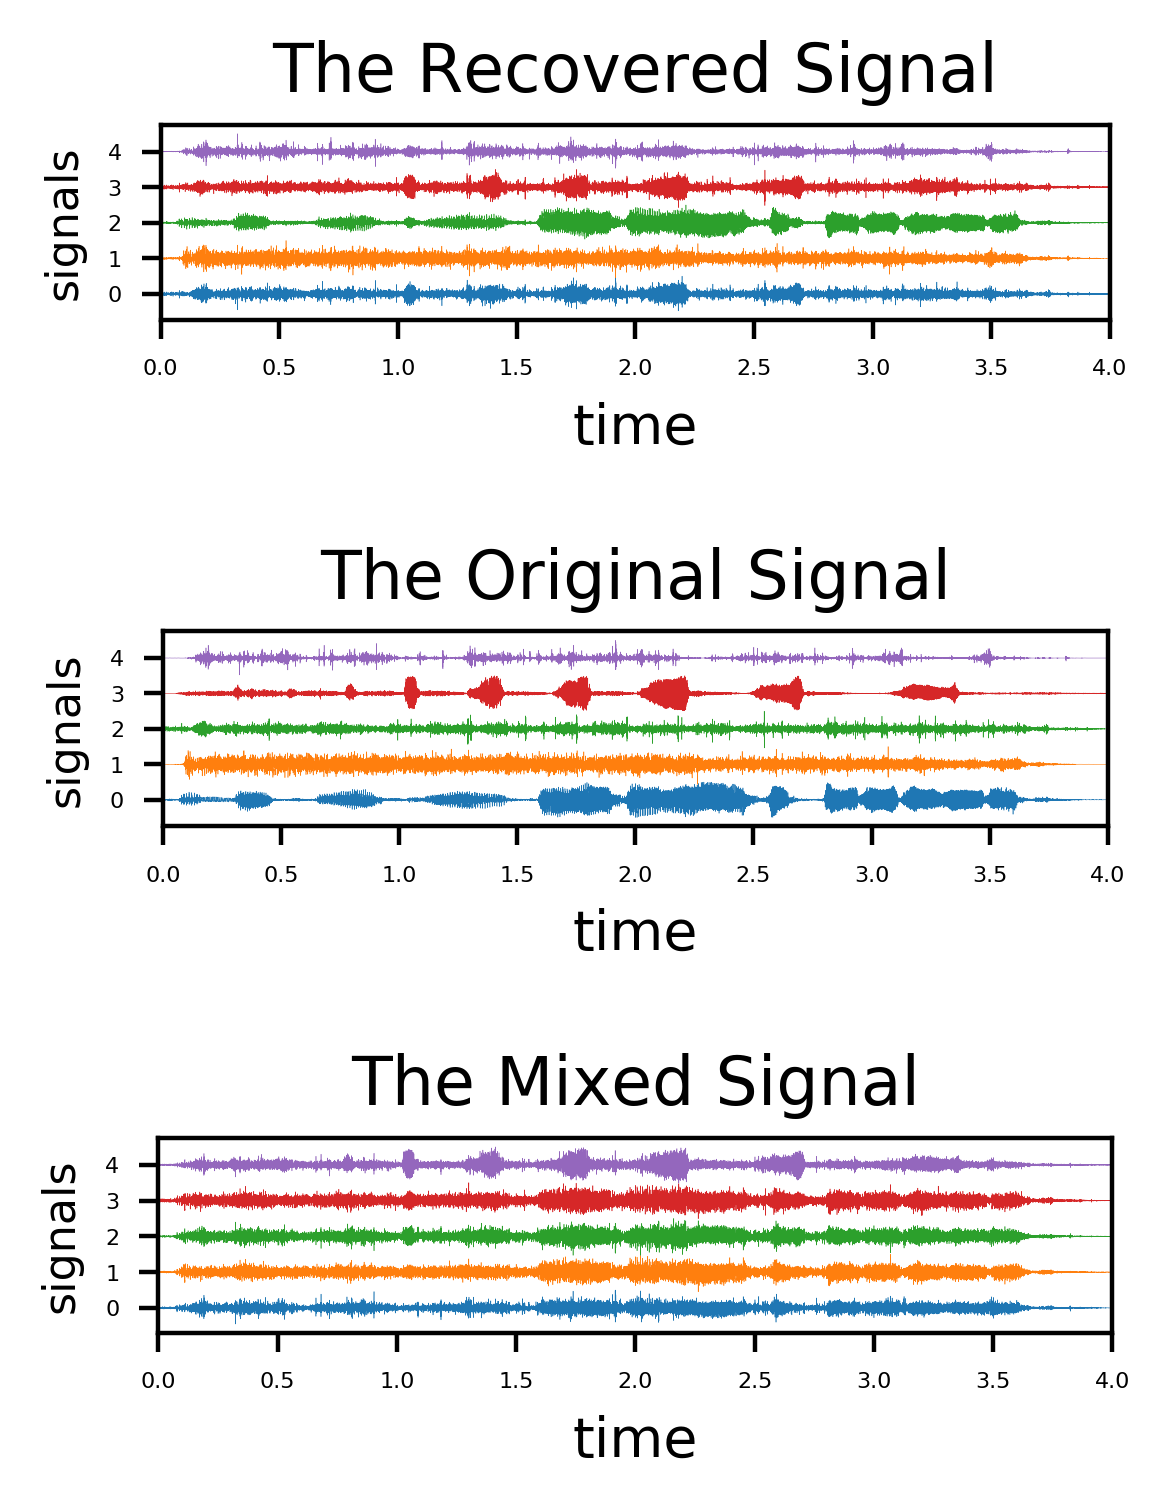

In [139]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
import sklearn.metrics as metrics
import sklearn.utils as utils
import os.path
import io
import base64
from IPython.core.display import HTML
from scipy.io import loadmat, wavfile
import sys, os

yeta = 0.01
n = 5
it = 1000
beta = 0

def main():
    dir_path = os.path.dirname(os.path.realpath('__file__'))
    sounds_file = os.path.join(dir_path, "drive/My Drive/Colab Notebooks/sounds.mat")
    sounds = scipy.io.loadmat(sounds_file)['sounds']
    S = normalize(sounds,norm='max', axis=1)
    #S = sounds
    V = np.random.uniform(-0.1,0.1,size=n*5).reshape(n,5)
    #print(np.linalg.det(V))
    #V = normalize(V,norm = 'l1')
    print("Mix Matrix")
    print(V)
    X = np.matmul(V,sounds)
    #X = normalize(X,norm='max',axis=1)
    cur_max = 0
    W_best = []
    Sn_best = []
    Corr_best = []
    for i in range(50):
        W,Sn = ICA(X,n)
        col = []
        for t in range(5):
            col.append([np.abs(np.corrcoef(S[t],Sn[j]))[0][1] for j in range(5)])
        col = np.array(col)
        corr_idx = np.argmax(col,axis=0)
        corr = np.amax(col,axis=0)
        print(col)
        corr_ = np.mean(corr)
        print("iteration: ",i,corr_,"max=",cur_max)
        if(corr_>cur_max):
            print(i,corr_,"max=",cur_max)
            Corr_best = corr
            cur_max = corr_
            W_best = W
            Sn_best = Sn

    X = normalize(X,norm='max',axis=1)
    plotMatrix(S,Sn,X)
    print("W_best")
    print(W)
    player(Sn[0])
    player(Sn[1])
    player(Sn[2])
    player(Sn[3])
    player(Sn[4])
    print("Correlation Matrix")
    print(Corr_best)
    print(cur_max)


def ICA(X,n):
    m,t = X.shape
    W = np.random.uniform(-0.1,0.1,size=n*m).reshape(n,m)
    #print("W at start")
    #print(W)
    deltaW = 0
    for i in range(it):
        Y = np.matmul(W,X)
        #print("Y")
        #print(Y)
        Z = 1/(1+np.exp(-Y))
        Q = 1-2*Z
        #print(Q.shape)
        #print("Q")
        #print(Q)
        #deltaW = np.exp(-i/it)*yeta*np.matmul(np.identity(n)+np.matmul(Q,Y.transpose()),W)
        deltaW = yeta*np.matmul(np.identity(n)+np.matmul(Q,Y.transpose()),W)
        #print("deltaW")
        #print(deltaW)
        W = W + deltaW
        #print("W")
        #print(W)
    #print(np.linalg.det(W))
    #print("W at end")
    #print(np.linalg.det(W))
    #print(W)
    Sn = normalize(np.matmul(W,X),norm='max', axis=1)
    return W,Sn

def plotMatrix(O,R,M):
    #fig,axs = plt.subplots(3,1)
    fig = plt.figure(dpi=400)
    axs = [1,2,3]
    axs[0] = fig.add_subplot(3,1,1,aspect=0.15)
    axs[2] = fig.add_subplot(3,1,2,aspect=0.15)
    axs[1] = fig.add_subplot(3,1,3,aspect=0.15)
    time = np.linspace(0,4,num=44000)
    plt.subplots_adjust(hspace=1.6)
    for i in range(5):
        print(O[i])
        axs[2].set_title('The Original Signal')
        axs[2].set_yticks([0,1,2,3,4])
        axs[2].set_xlim(0,4)
        axs[2].set_xlabel('time')
        axs[2].set_ylabel('signals',fontsize=8)
        axs[2].plot(time,i+0.5*O[i],lw=0.1)
        axs[2].tick_params(axis='both', which='major', labelsize=4)
    for i in range(5):
        axs[0].set_title('The Recovered Signal')
        axs[0].set_yticks([0,1,2,3,4])
        axs[0].set_xlim(0,4)
        axs[0].set_xlabel('time')
        axs[0].set_ylabel('signals',fontsize=8)
        axs[0].plot(time,i+0.5*R[i],lw=0.1)
        axs[0].tick_params(axis='both', which='major', labelsize=4)
    for i in range(5):
        print(M[i])
        axs[1].set_title('The Mixed Signal')
        axs[1].set_yticks([0,1,2,3,4])
        axs[1].set_xlim(0,4)
        axs[1].set_xlabel('time')
        axs[1].set_ylabel('signals',fontsize=8)
        axs[1].plot(time,i+0.5*M[i],lw=0.1)
        axs[1].tick_params(axis='both', which='major', labelsize=4)
    plt.savefig('summary.png',dpi=400)
    plt.savefig('graph.svg')
    #plt.show()

def player(wave, bitrate=11025):
    
    # convert to PCM (some browsers does not support)
    if wave.dtype in [np.float32, np.float64]:
        wave = (wave * 32767).astype(np.int16)

    fh = io.BytesIO()
    wavfile.write(fh, bitrate, wave)
    enc = base64.b64encode(fh.read()).decode('ascii')
    
    display(HTML(f'''
    <audio controls="controls">
      <source src="data:audio/wav;base64,{enc}" type="audio/wav" />
      Your browser does not support audio.
    </audio>
    '''))




if __name__ == '__main__':
    main()

# 新段落

![替代文字](https://)# 新段落